In [1]:
import pandas as pd
import seaborn as sns
import os

In [14]:
# sym_df = pd.read_csv("../logs/sym_test/progress.csv")
# sym_df["time/total_timesteps"] -= sym_df["iteration"] * 50000
# sym_df["time/total_timesteps"] += sym_df["iteration"] * 8192 * 7
# sym_df.to_csv("../logs/sym_test/progress.csv")

In [6]:
LOGS_DIR = "../logs"

dfs = []

for test in next(os.walk(LOGS_DIR))[1]:
    if test == "old_logs":
        continue
    test_df = pd.read_csv(f"{LOGS_DIR}/{test}/progress.csv")
    test_df["test_name"] = test
    dfs.append(test_df)
    break

df = pd.concat(dfs)
df

,time/iterations,time/time_elapsed,time/total_timesteps,time/fps,rollout/ep_len_mean,rollout/ep_rew_mean,train/approx_kl,train/value_loss,train/explained_variance,train/n_updates,train/clip_fraction,train/std,train/clip_range,train/entropy_loss,train/learning_rate,train/policy_gradient_loss,train/loss,test_name
0,1,3,32768,9855,500.0,-1302.433324,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,sym_test
1,2,18,65536,3606,500.0,-1305.296821,0.007622,89.049483,-0.000069,10.0,0.086313,0.990125,0.2,-8.457354,0.0003,-0.005092,34.711987,sym_test
2,1,3,98304,10162,500.0,-1310.723038,0.007778,79.765062,0.314744,20.0,0.070386,0.974004,0.2,-8.368958,0.0003,-0.005699,34.833447,sym_test
3,2,17,131072,3669,500.0,-1298.250406,0.007558,80.019840,0.410069,30.0,0.070132,0.964705,0.2,-8.307225,0.0003,-0.007013,25.468901,sym_test
4,1,3,163840,10501,500.0,-1288.157269,0.007456,74.885416,0.543447,40.0,0.075134,0.951055,0.2,-8.213244,0.0003,-0.006780,31.541508,sym_test
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,2,17,12976128,3733,500.0,-946.903117,112942.150000,70.669340,0.551421,3950.0,0.999805,0.153561,0.2,3.093997,0.0003,0.342406,38.571564,sym_test
396,1,3,13008896,10372,500.0,-947.057547,367260.940000,64.930644,0.565938,3960.0,0.999805,0.153607,0.2,3.090854,0.0003,0.340211,28.882217,sym_test
397,2,17,13041664,3713,500.0,-947.145851,249756.940000,65.166502,0.570400,3970.0,0.999805,0.153558,0.2,3.088813,0.0003,0.338763,29.371819,sym_test
398,1,3,13074432,10424,500.0,-978.781576,144256.170000,66.461193,0.563058,3980.0,0.999802,0.153554,0.2,3.086494,0.0003,0.340101,32.298122,sym_test


[Text(0.5, 1.0, 'Reward over time'),
 Text(0.5, 0, 'timesteps'),
 Text(0, 0.5, 'reward')]

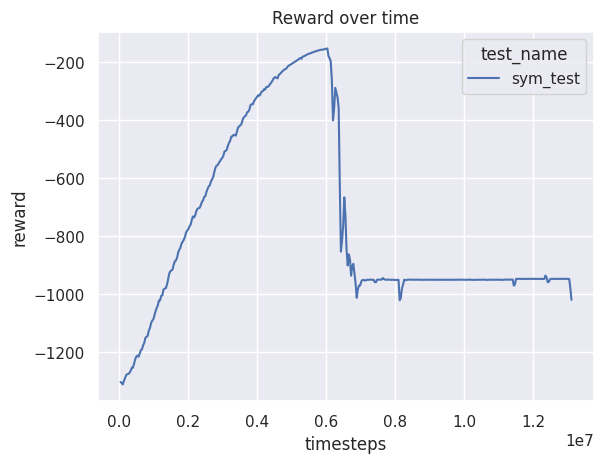

In [7]:
sns.set_theme()
ax = sns.lineplot(x="time/total_timesteps", y="rollout/ep_rew_mean", hue="test_name", data=df)
ax.set(title="Reward over time", xlabel="timesteps", ylabel="reward")

In [55]:
next(os.walk("../logs"))[1]

['baseline_test', 'sym_test']